In [6]:
from cleaning import clean
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


In [7]:
raw_data = pd.read_csv("appstore_data.csv")

In [8]:
df = clean(raw_data) #importing preprocessing functions(clean) from the cleaning.py file 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 13 columns):
age_rating       5004 non-null object
app_rating       5004 non-null float64
category         5004 non-null object
compatibility    5004 non-null object
languages        4966 non-null object
name             5004 non-null object
price            5004 non-null object
rank             3114 non-null float64
rating_count     5004 non-null float64
size             5004 non-null object
num_languages    5004 non-null int64
boolean_rank     5004 non-null bool
free_or_not      5004 non-null bool
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 439.9+ KB


In [8]:
df.sample(10)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3140,4,4.8,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,English,7 Minute Workout: Fitness App,Free,90.0,30200.0,47.3,1,True,False
4798,4,4.1,Social Networking,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Danish, Dutch, French, German...",Soap - Social Analytics,Free,NaN,1100.0,50.2,14,False,False
869,4,4.3,Games,Requires iOS 8.0 or later. Compatible with iPh...,English,Charades!™,Free,12.0,3000.0,69.7,1,True,False
1063,4,1.7,Entertainment,Requires iOS 6.0 or later. Compatible with iPh...,Spanish,National Geographic en Español Revista,Free,NaN,10.0,26.9,1,False,False
2891,17,4.4,Productivity,Requires iOS 9.0 or later. Compatible with iPh...,"English, Simplified Chinese, Traditional Chinese",Password Manager',Free,NaN,11800.0,26.2,3,False,False
1271,4,4.8,Lifestyle,Requires iOS 10.0 or later. Compatible with iP...,English,Unlaced,Free,NaN,15300.0,45.4,1,False,False
185,9,4.8,Reference,Requires iOS 9.3 or later. Compatible with iPh...,English,Pleco Chinese Dictionary,Free,130.0,748.0,136,1,True,False
4353,4,4.7,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, Dutch, French, German, Italian, Portu...",Sticker Maker Studio,Free,57.0,10600.0,31.8,8,True,False
3251,12,4.6,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, German, Japanese, Korean, Spanish",Noom,Free,27.0,102500.0,140.3,5,True,False
4923,17,4.0,Social Networking,Requires iOS 9.1 or later. Compatible with iPh...,"English, Arabic, French, Indonesian, Italian, ...",Crowdfire,Free,NaN,3100.0,114.4,9,False,False


In [475]:
df['size'] = df['size'].astype(float)

Text(0.5, 0, 'Size (MB)')

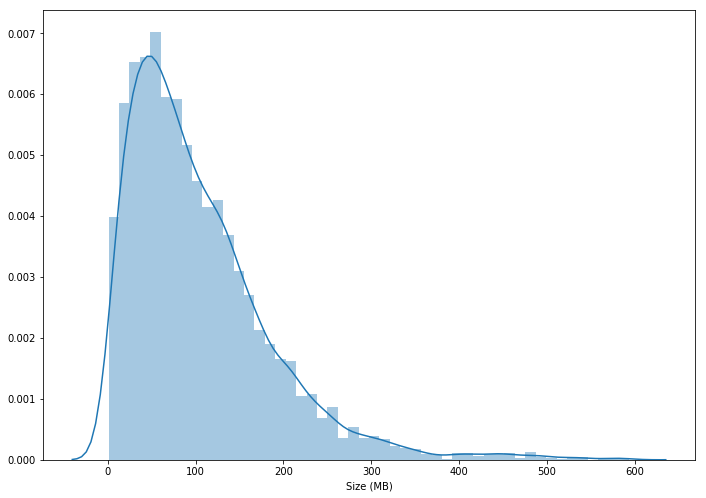

In [476]:
#distribution of apps size in the apps store.
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.distplot(df[df['size']<600]['size']).set_xlabel('Size (MB)')


(0, 500)

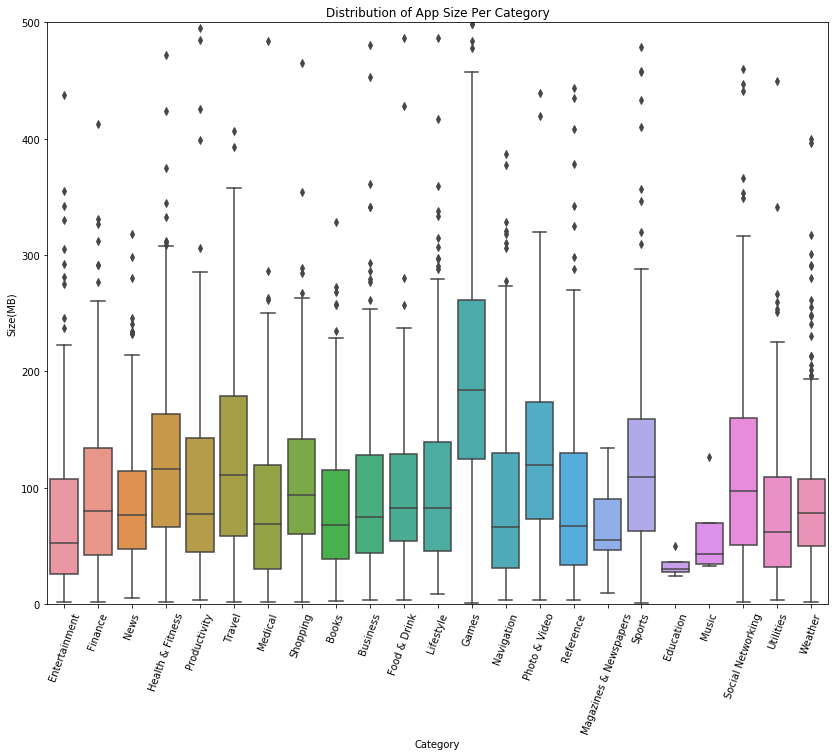

In [481]:
#distribution of apps size per category.

a4_dims = (14, 10.7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.boxplot(data = df, x ='category',y='size',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Distribution of App Size Per Category')
ax.set_ylabel('Size(MB)')
ax.set_xlabel('Category')
plt.ylim(0,500)


(0, 650000)

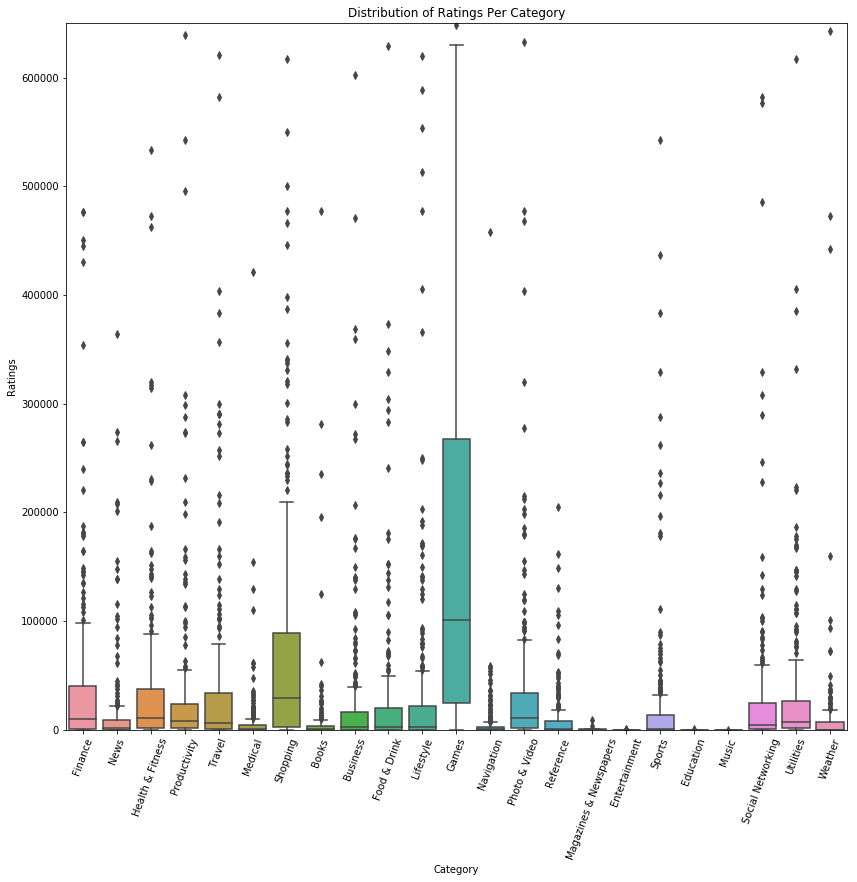

In [484]:
a4_dims = (14, 13)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.boxplot(data = df[df['rating_count']!=0], x ='category',y='rating_count',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Distribution of Ratings Per Category')
ax.set_ylabel('Ratings')
ax.set_xlabel('Category')
plt.ylim(0,650000)



In [485]:
df['free_or_not']=df['price']=='Free'

Text(27.125, 0.5, 'App Rating')

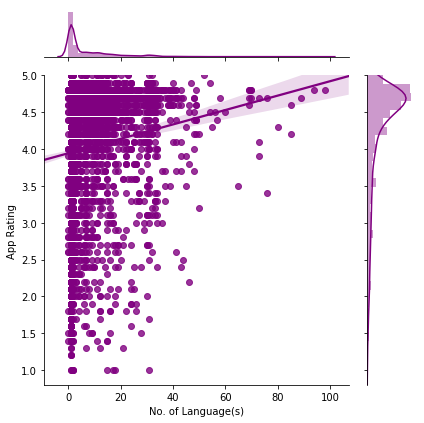

In [486]:

sns.jointplot('num_languages','app_rating',data=df,kind ="reg",space=0.4,color="purple")
plt.ylim(0.8,5)
plt.xlabel("No. of Language(s)")
plt.ylabel("App Rating")


In [329]:
app_rating_per_age= df.groupby('age_rating').agg({'app_rating':'mean'}).reset_index().sort_values(by='app_rating')

In [330]:
app_rating_per_age

,age_rating,app_rating
1,17,3.889204
2,4,4.014767
3,9,4.092035
0,12,4.092932


In [331]:
df.groupby('age_rating').agg({'rating_count':'sum'})

,rating_count
age_rating,
12,70040995.0
17,26760587.0
4,204944117.0
9,5933214.0


In [332]:
avg_app_rating_df =df.groupby('category').agg({'app_rating':'mean'}).sort_values(by='app_rating').reset_index()

In [333]:
avg_app_rating_df.head(5)

,category,app_rating
0,Entertainment,1.369261
1,Education,3.475000
2,Magazines & Newspapers,3.775000
3,Weather,3.888750
4,Navigation,3.950000


Text(0.5, 0, 'Category')

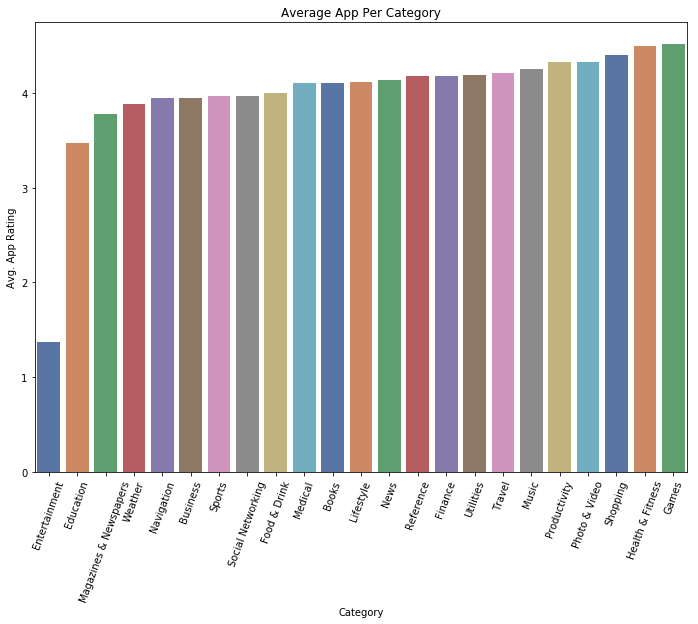

In [334]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data=avg_app_rating_df, y='app_rating',x='category',palette="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Average App Per Category')
ax.set_ylabel('Avg. App Rating')
ax.set_xlabel('Category')

In [335]:
rating_count_per_age =df.sort_values(by='rating_count', ascending =False).groupby('age_rating').agg({'rating_count':'sum'}).reset_index() #the most ratings

In [336]:
rating_count_per_age

,age_rating,rating_count
0,12,70040995.0
1,17,26760587.0
2,4,204944117.0
3,9,5933214.0


Text(0.5, 0, 'Age Rating')

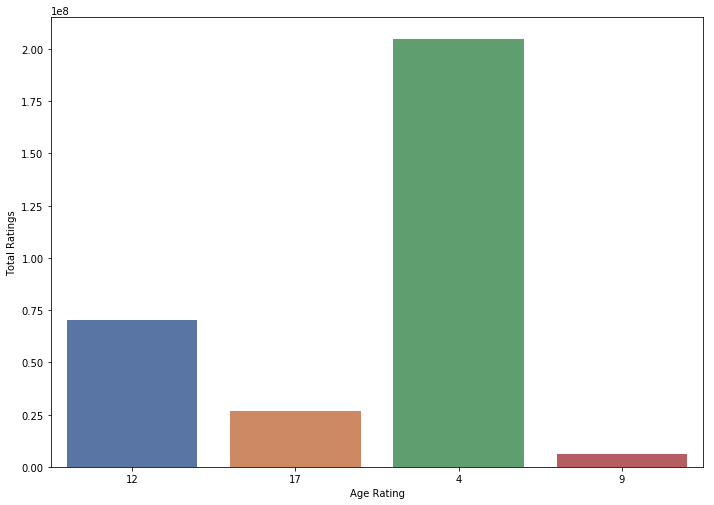

In [337]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data= rating_count_per_age,x ='age_rating',y='rating_count',palette="deep")
plot.set_title('Total Ratings per Age Rating')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Age Rating')


In [338]:
df.sort_values(by='rank').groupby('rank')

Text(0.5, 0, 'App Store Rank')

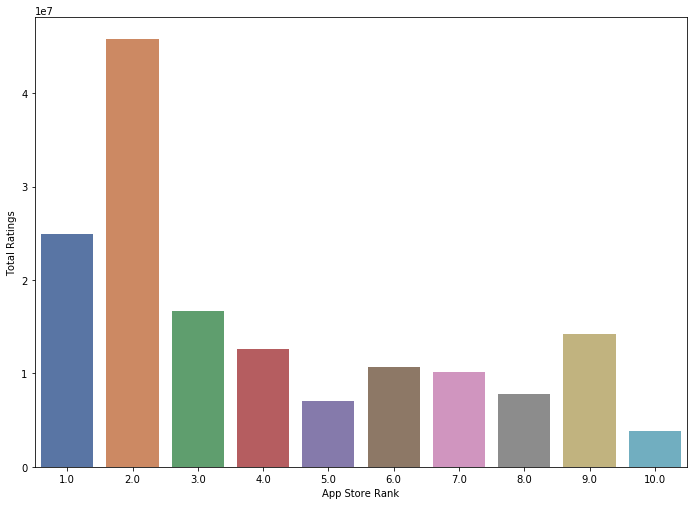

In [339]:
top_ratings_per_rank =df[df['rank']<=10].sort_values('rank').groupby('rank').agg({'rating_count':'sum'}).reset_index()
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data =top_ratings_per_rank,x='rank',y='rating_count',palette="deep")
plot.set_title('Total Ratings of Top 10 Ranked Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('App Store Rank')






#apps with a top 5 rank

In [340]:
df.assign(free_boolean =df['price']=='Free').head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_boolean
0,4,0.0,Entertainment,Requires iOS 7.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",Birthday Songs with Calendar - Happy Birthday ...,Free,NaN,0.0,22.6,6,False,True
1,17,4.3,Finance,Requires iOS 9.0 or later. Compatible with iPh...,English,Long Game Savings,Free,NaN,2100.0,152.0,1,False,True
2,4,4.2,News,Requires iOS 10.3 or later. Compatible with iP...,English,Downcast,$2.99,8.0,1400.0,41.4,1,True,False
3,4,4.5,Health & Fitness,Requires iOS 11.2 or later. Compatible with iP...,"English, French, German, Italian, Portuguese, ...",FitCoach: Weight Loss Workouts,Free,28.0,453.0,93.3,7,True,True
4,4,4.7,Productivity,Requires iOS 9.0 or later. Compatible with iPh...,English,Event Countdown Lite,Free,NaN,14600.0,69.5,1,False,True


In [341]:
rating_count_df= df.groupby('category').agg({'rating_count':'sum'}).reset_index().sort_values('rating_count',ascending =False)

In [342]:
rating_count_df

,category,rating_count
6,Games,53587765.0
4,Finance,32034661.0
14,Photo & Video,31458421.0
20,Travel,29319331.0
17,Shopping,26771797.0
5,Food & Drink,21410716.0
18,Social Networking,17640405.0
15,Productivity,14377139.0
21,Utilities,13699826.0
8,Lifestyle,12927939.0


Text(0.5, 0, 'Category')

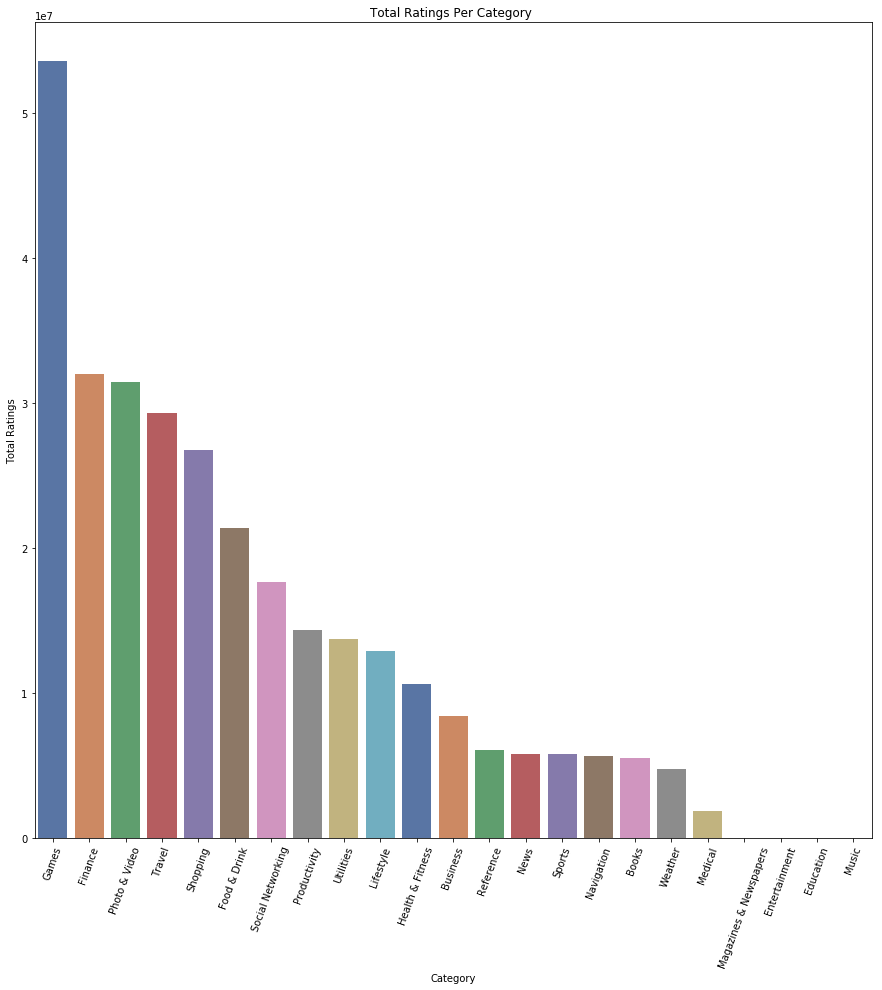

In [343]:
#Most Ratings Per Category


a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot= sns.barplot(x="category", y="rating_count", data=rating_count_df,palette ="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Total Ratings Per Category ')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Category')


(10, 650000)

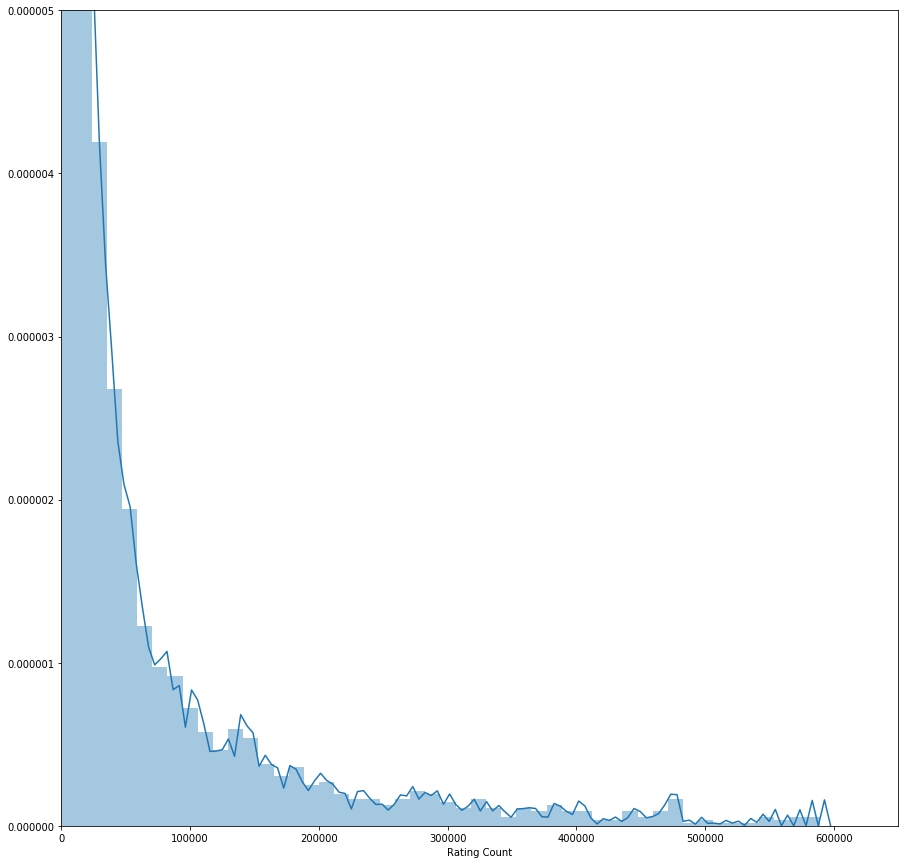

In [344]:
#Density of Rating Count

a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.distplot(df[(df['rating_count']!=0)& (df['rating_count']< 600000)]['rating_count']).set_xlabel('rating count')

ax.set_xlabel('Rating Count')
plt.ylim(0,0.000005)
plt.xlim(10,650000)



In [345]:
#Top Paid Games

top_paid_games = df[(df["category"]=="Games") & (df["price"]!='Free')].sort_values(by='rating_count',ascending =False)
top_paid_games.head(10)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
912,9,4.4,Games,Requires iOS 8.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Minecraft,$6.99,1.0,191400.0,285.1,11,True
808,12,4.8,Games,Requires iOS 8.0 or later. Compatible with iPh...,"English, Spanish",Heads Up!,$0.99,1.0,76000.0,143.4,2,True
744,4,4.7,Games,Requires iOS 8.0 or later. Compatible with iPh...,"English, Dutch, French, German, Italian, Spanish",Tiny Wings,$1.99,6.0,2600.0,29.2,6,True
850,4,4.1,Games,Requires iOS 7.0 or later. Compatible with iPh...,"English, Arabic, French, German, Indonesian, I...",Fruit Ninja Classic,$1.99,11.0,857.0,114.3,16,True
790,4,4.2,Games,Requires iOS 8.0 or later. Compatible with iPh...,English,Doodle Jump,$0.99,16.0,387.0,61.4,1,True


Text(0.5, 0, '')

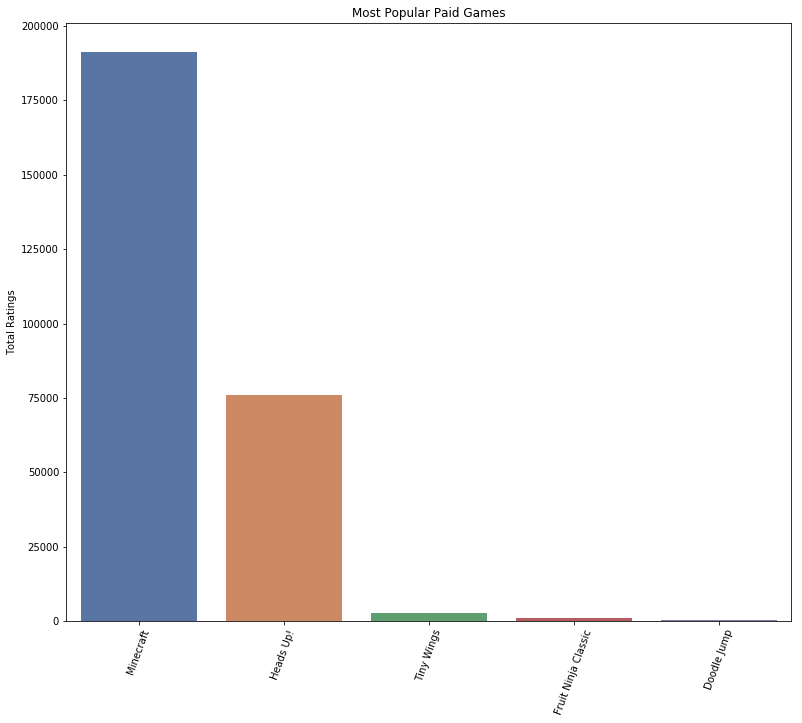

In [346]:
#Top Paid Games

a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_games, x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Paid Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Game')
ax.set_xlabel( '')



In [347]:
top_free_games = df[(df["category"]=="Games") & (df["price"]=='Free')].sort_values(by='rating_count',ascending =False)
top_free_games.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
958,12,4.6,Games,Requires iOS 11.0 or later. Compatible with iP...,English,Fortnite,Free,1.0,4300000.0,148.4,1,True
946,17,4.8,Games,Requires iOS 9.0 or later. Compatible with iPh...,English,Sniper 3D Assassin: Gun Games,Free,10.0,1600000.0,274.7,1,True
846,4,4.5,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, French, German, Indonesian, I...",Golf Clash,Free,20.0,1400000.0,127.9,16,True
954,12,4.7,Games,Requires iOS 8.0 or later. Compatible with iPh...,English,Episode - Choose Your Story,Free,3.0,1400000.0,144.5,1,True
956,12,4.6,Games,Requires iOS 8.0 or later. Compatible with iPh...,"English, French, German, Indonesian, Italian, ...",Roblox,Free,2.0,1300000.0,167.5,15,True


Text(0.5, 0, '')

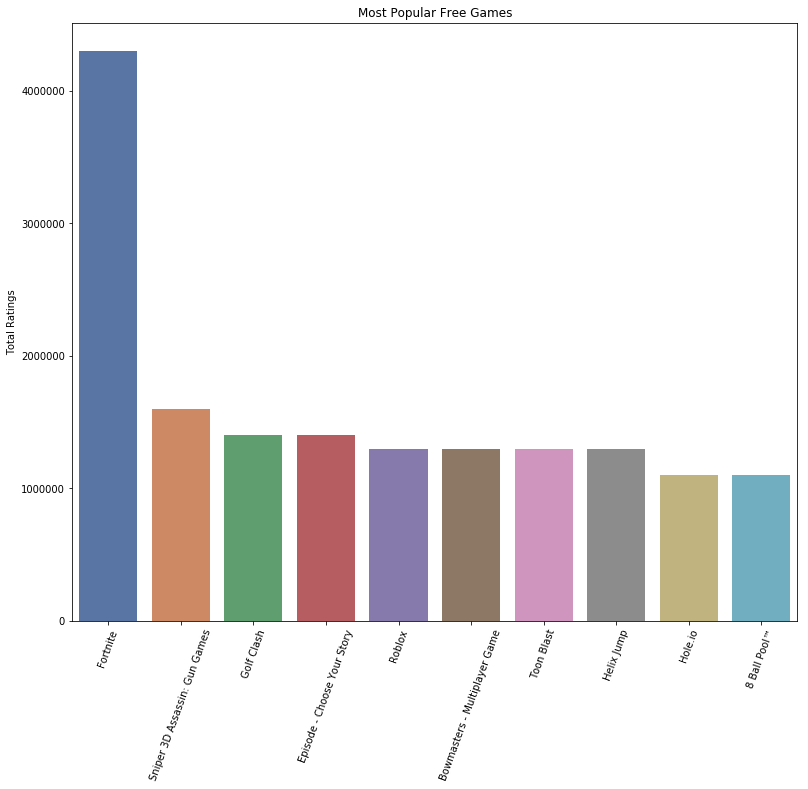

In [348]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_games.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Free Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [349]:
top_paid_books = df[(df["category"]=="Books") & (df["price"]!='Free')].sort_values(by='rating_count',ascending =False)
top_paid_books.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
1987,4,4.9,Books,Requires iOS 9.3 or later. Compatible with iPh...,"English, Spanish",NIV Bible,$5.99,15.0,2400.0,92.2,2,True
1898,12,4.6,Books,Requires iOS 8.0 or later. Compatible with iPh...,"English, Danish, Dutch, Finnish, French, Germa...",MegaReader,$1.99,152.0,819.0,81.4,17,True
2041,4,4.4,Books,Requires iOS 10.0 or later. Compatible with iP...,English,Jesus Calling Devotional,$9.99,1.0,375.0,168.4,1,True
1923,4,4.5,Books,Requires iOS 10.0 or later. Compatible with iP...,English,A Charlie Brown Christmas,$4.99,157.0,193.0,149.7,1,True
1921,4,4.9,Books,Requires iOS 9.1 or later. Compatible with iPh...,English,Self Help Classics .,$4.99,151.0,71.0,53.6,1,True


Text(0.5, 0, '')

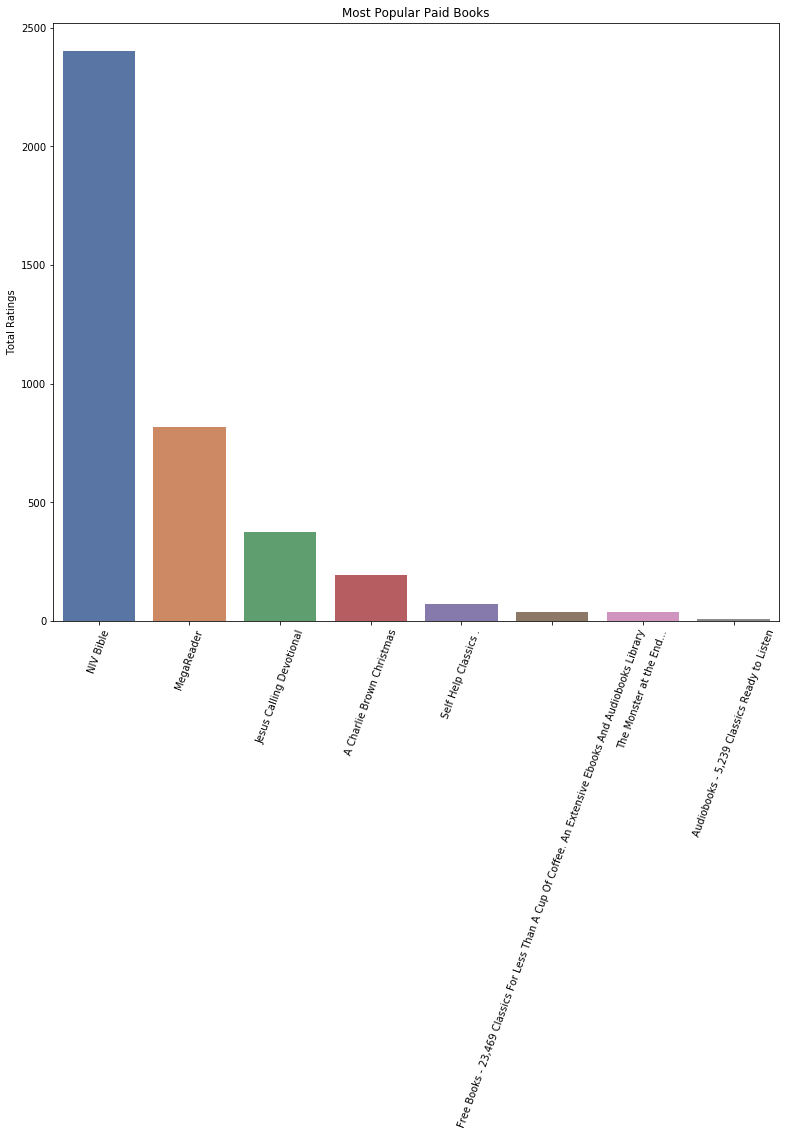

In [350]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_books.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Paid Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [351]:
top_free_books = df[(df["category"]=="Books") & (df["price"]=='Free')].sort_values(by='rating_count',ascending =False)
top_free_books.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
2131,4,4.9,Books,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Sp...",Audible audiobooks & originals,Free,2.0,2100000.0,97.2,6,True
2134,4,4.8,Books,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Italian, Japan...",Amazon Kindle,Free,3.0,1300000.0,138.6,10,True
2121,4,4.8,Books,Requires iOS 9.0 or later. Compatible with iPh...,English,"Libby, by OverDrive",Free,6.0,476800.0,21.2,1,True
2126,4,4.8,Books,Requires iOS 11.0 or later. Compatible with iP...,"English, Italian",Goodreads: Book Reviews,Free,11.0,281200.0,109.3,2,True
2133,17,4.7,Books,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Czech, Danish, Dutch, Filipin...",Wattpad,Free,4.0,235000.0,145.0,26,True


Text(0.5, 0, '')

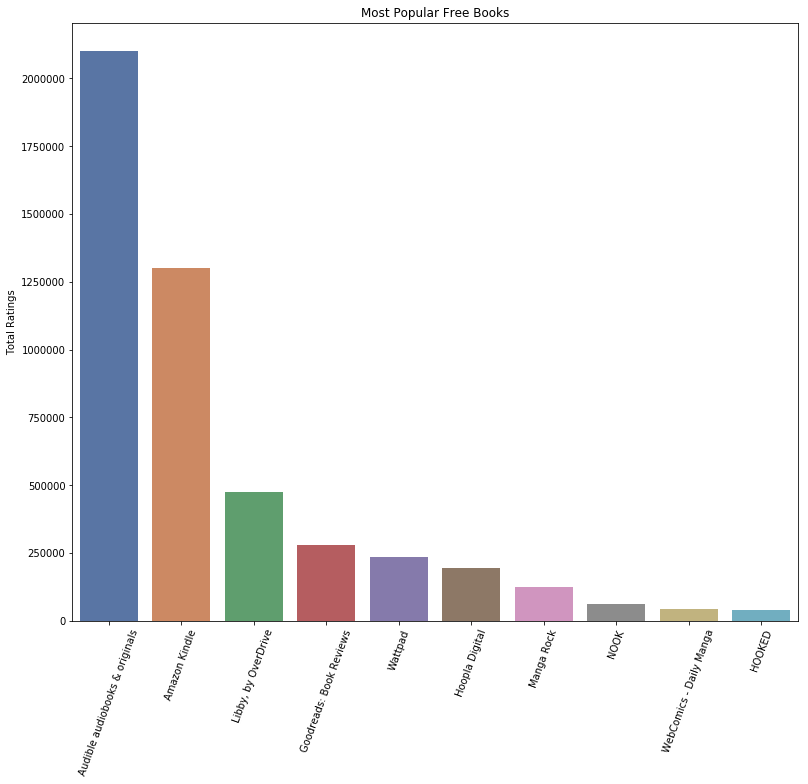

In [352]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_books.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Free Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [353]:
top_social_network = df[(df["category"]=="Social Networking")].sort_values(by='rating_count',ascending =False)
top_social_network.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
5000,12,4.7,Social Networking,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Catalan, Croatian, C...",WhatsApp Messenger,Free,3.0,5300000.0,155.7,39,True
5001,12,4.8,Social Networking,Requires iOS 9.3 or later. Compatible with iPh...,"English, Czech, Danish, Dutch, Filipino, Finni...",Pinterest,Free,6.0,2600000.0,134.8,30,True
4989,4,4.7,Social Networking,Requires iOS 10.0 or later. Compatible with iP...,English,Marco Polo - Video Chat,Free,35.0,1200000.0,174.3,1,True
4994,4,4.7,Social Networking,Requires iOS 9.0 or later. Compatible with iPh...,"English, Dutch, French, German, Indonesian, It...",GroupMe,Free,8.0,1000000.0,87.6,14,True
5002,12,4.2,Social Networking,Requires iOS 9.0 or later. Compatible with iPh...,"English, Croatian, Czech, Danish, Dutch, Finni...",Messenger,Free,1.0,819200.0,282.7,27,True


Text(0.5, 0, '')

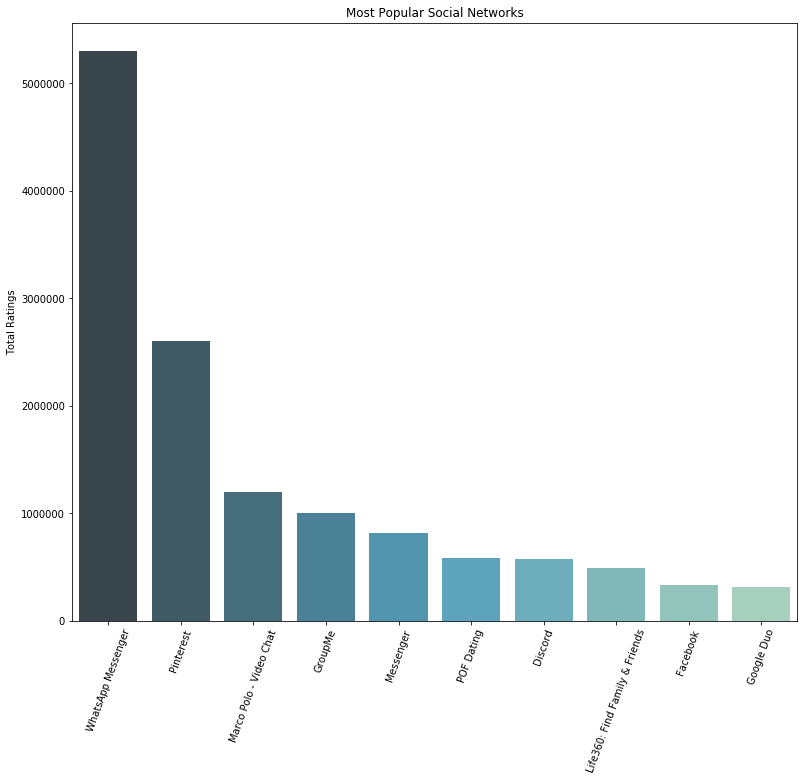

In [354]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_social_network.head(10), x ='name',y ='rating_count',palette="GnBu_d")
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Social Networks')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [355]:
top_productivity = df[(df["category"]=="Productivity")].sort_values(by='rating_count',ascending =False)
top_productivity.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
3085,4,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Catalan, Chinese (Hong Kong),...",Google Drive,Free,4.0,2500000.0,216.0,34,True
3081,4,4.6,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Bengali, Bulgarian, Catalan, ...",Yahoo Mail - Organized Email,Free,8.0,2000000.0,190.9,49,True
3082,4,4.7,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...",Microsoft Outlook,Free,2.0,1200000.0,285.3,69,True
3083,4,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...","Google Docs: Sync, Edit, Share",Free,6.0,848600.0,176.3,70,True
3068,4,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Czech, Danish, Dutch, Finnish, French...",HP Smart,Free,16.0,639500.0,75.1,21,True


Text(0.5, 0, '')

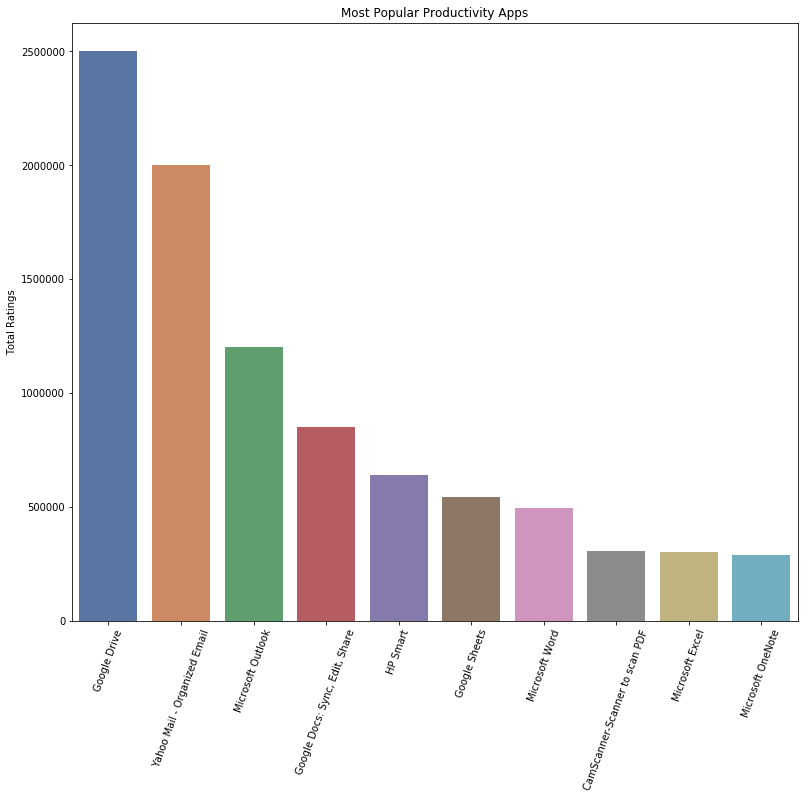

In [356]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_productivity.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Productivity Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [357]:
df.category.unique()

array(['Entertainment', 'Finance', 'News', 'Health & Fitness',
       'Productivity', 'Travel', 'Medical', 'Shopping', 'Books',
       'Business', 'Food & Drink', 'Lifestyle', 'Games', 'Navigation',
       'Photo & Video', 'Reference', 'Magazines & Newspapers', 'Sports',
       'Education', 'Music', 'Social Networking', 'Utilities', 'Weather'],
      dtype=object)

In [358]:
top_news = df[(df["category"]=="News")].sort_values(by='rating_count',ascending =False)
top_news.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
3567,17,4.6,News,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Twitter,Free,1.0,1000000.0,116.1,33,True
3565,17,4.8,News,Requires iOS 11.0 or later. Compatible with iP...,English,Reddit,Free,3.0,711700.0,61.2,1,True
3566,12,4.7,News,Requires iOS 11.0 or later. Compatible with iP...,English,CNN: Breaking US & World News,Free,5.0,364200.0,133.3,1,True
3562,12,4.7,News,Requires iOS 10.3 or later. Compatible with iP...,English,Fox News: Live Breaking News,Free,7.0,274200.0,122.5,1,True
3544,4,4.7,News,Requires iOS 11.0 or later. Compatible with iP...,English,CNBC: Stock Market & Business,Free,16.0,266100.0,107.8,1,True


Text(0.5, 0, '')

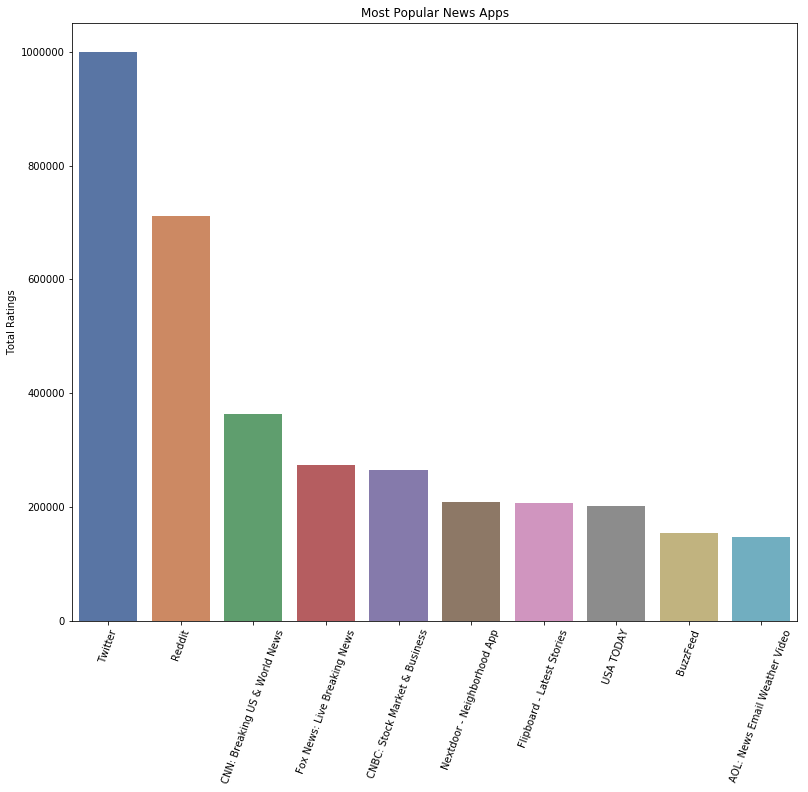

In [500]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_news.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular News Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [360]:
top_fitness_apps = df[(df["category"]=="Health & Fitness")].sort_values(by='rating_count',ascending =False)
top_fitness_apps.head(10)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank
3328,4,4.7,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, Danish, Dutch, Filipino, French, Germ...",MyFitnessPal,Free,5.0,703600.0,191.8,20,True
3321,12,4.8,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,"English, Dutch, French, German, Portuguese, Sw...",WW (Weight Watchers),Free,35.0,695000.0,200.4,6,True
3322,4,4.9,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German",Headspace: Meditation & Sleep,Free,12.0,533200.0,158.0,3,True
3325,4,4.8,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Spanish",Calm,Free,1.0,472800.0,132.4,4,True
3319,12,4.8,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, Danish, Finnish, French, German, Hind...",Flo Period & Ovulation Tracker,Free,2.0,462200.0,128.7,21,True
3326,4,4.7,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Burmese, Cambodian, Chinese (...",Lose It! – Calorie Counter,Free,19.0,320000.0,168.9,30,True
3273,4,4.8,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,English,Carb Manager: Keto Diet App,Free,15.0,317200.0,30.5,1,True
3323,4,4.8,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Indonesian, Italian, ...",Map My Run by Under Armour,Free,36.0,314400.0,302.6,12,True
3324,4,4.8,Health & Fitness,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Indonesian, It...",Nike Run Club,Free,17.0,262300.0,241.5,16,True
3312,9,4.9,Health & Fitness,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Spanish","AllTrails: Hike, Bike & Run",Free,13.0,231000.0,192.5,4,True


Text(0.5, 0, '')

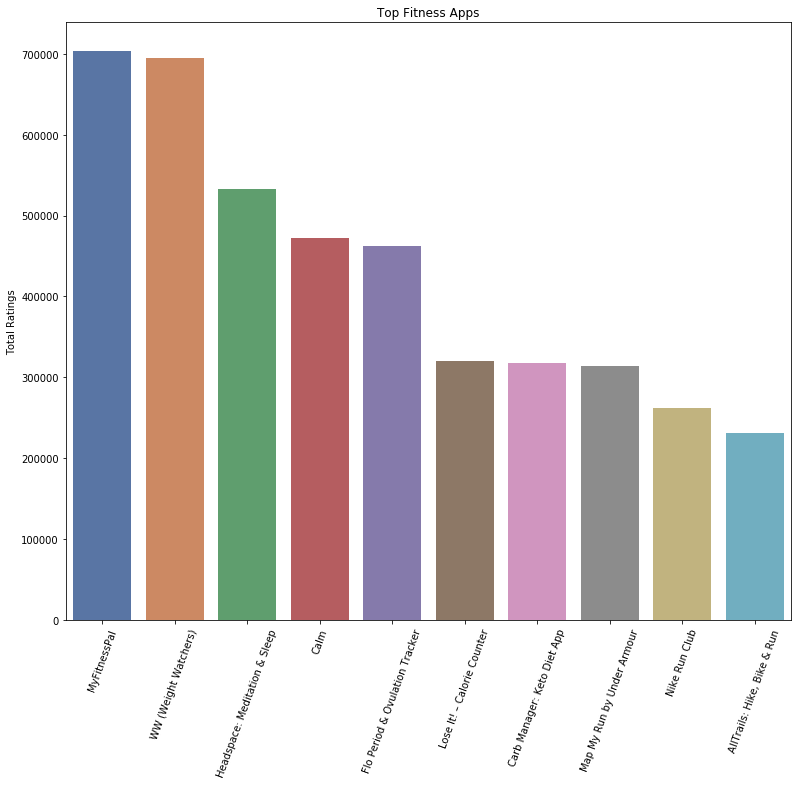

In [361]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_fitness_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Fitness Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [362]:
top_shopping_apps = df[(df["category"]=="Shopping")].sort_values(by='rating_count',ascending =False)

Text(0.5, 0, '')

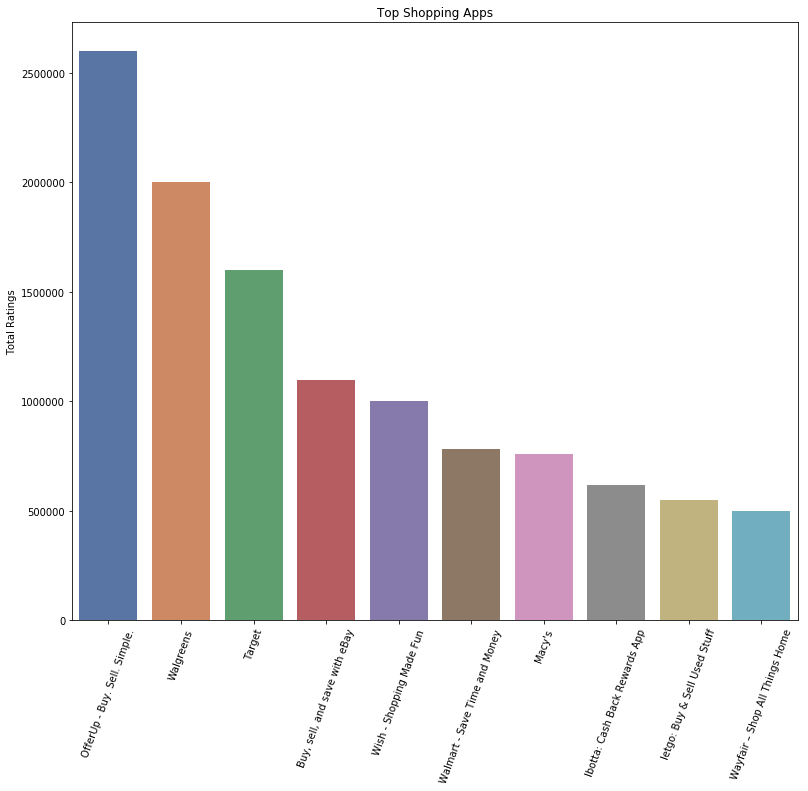

In [363]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_shopping_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Shopping Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [364]:
 top_medical_apps =df[(df["category"]=="Medical")].sort_values(by='rating_count',ascending =False)

Text(0.5, 0, '')

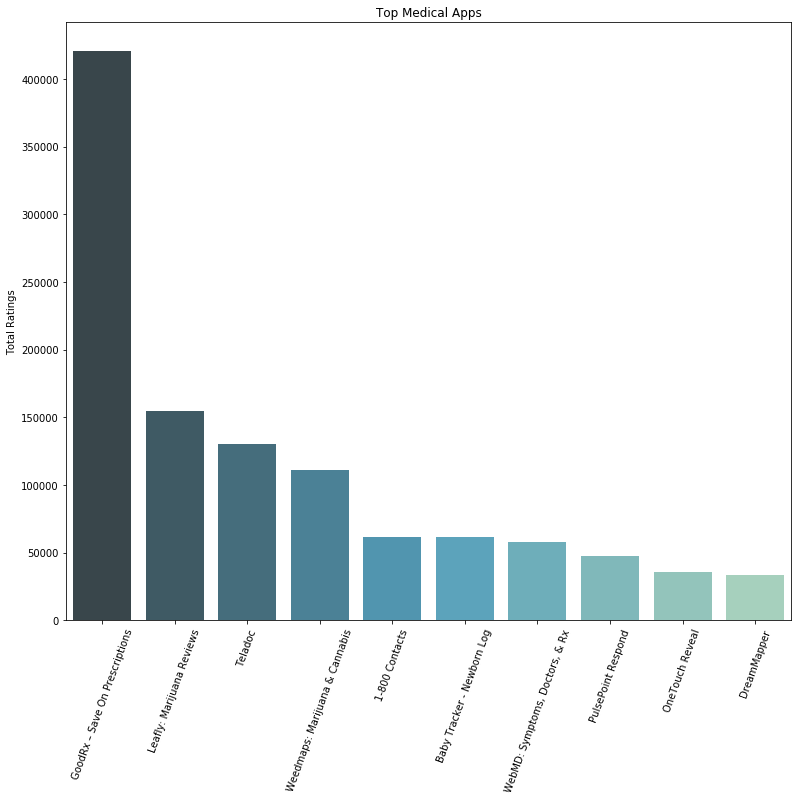

In [365]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_medical_apps.head(10), x ='name',y ='rating_count',palette='GnBu_d')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Medical Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [366]:
top_lifestyle_apps =df[(df["category"]=="Lifestyle")].sort_values(by='rating_count',ascending =False)

Text(0.5, 0, '')

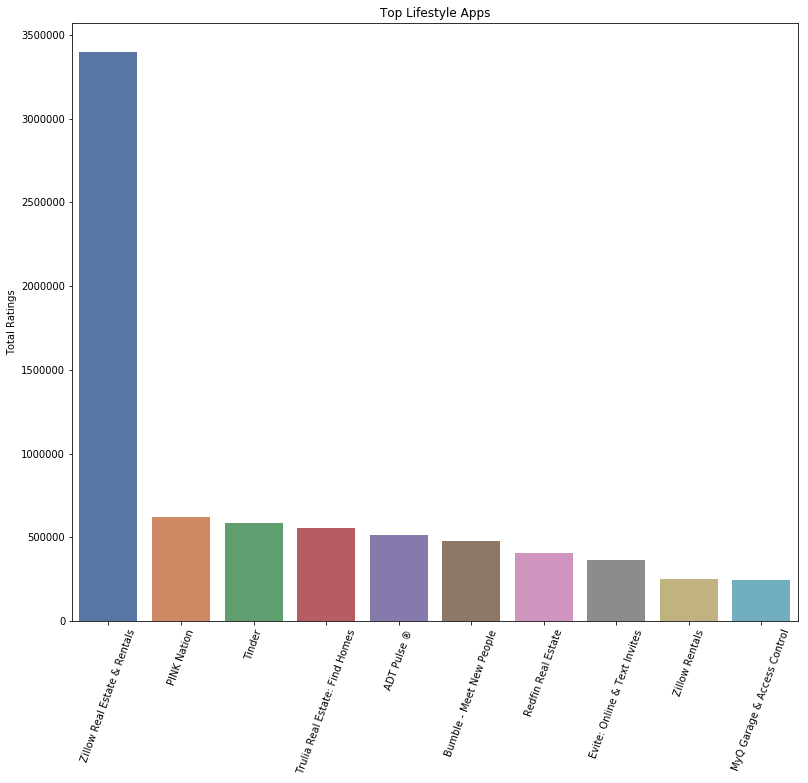

In [367]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_lifestyle_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Lifestyle Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [368]:
top_travel_apps= df[(df["category"]=="Travel")].sort_values(by='rating_count',ascending =False)

Text(0.5, 0, '')

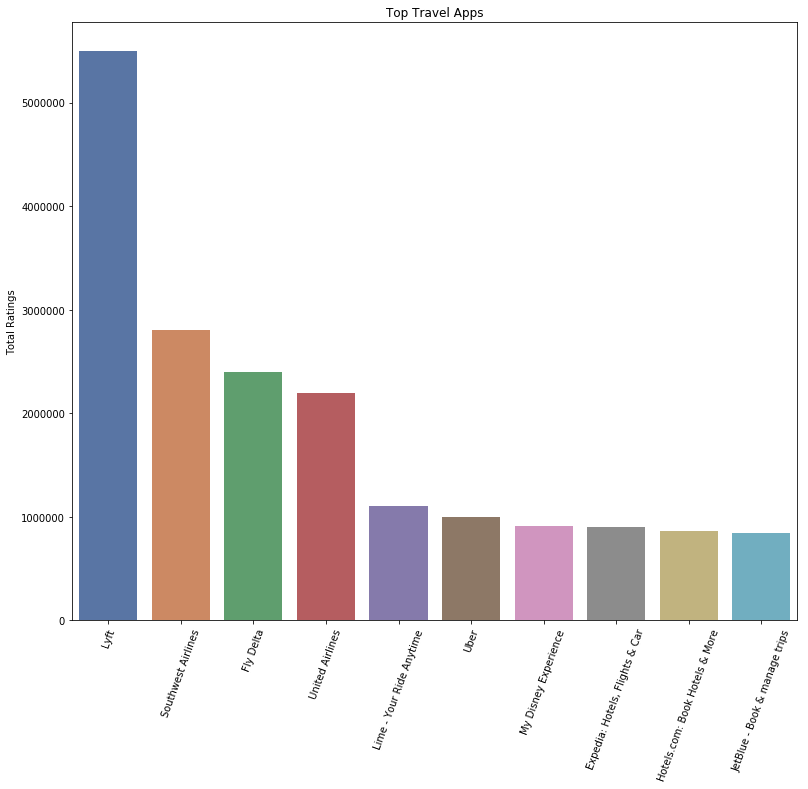

In [369]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_travel_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Travel Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [414]:
top_finance_apps=df[(df["category"]=="Finance")].sort_values(by='rating_count',ascending =False)

Text(0.5, 0, '')

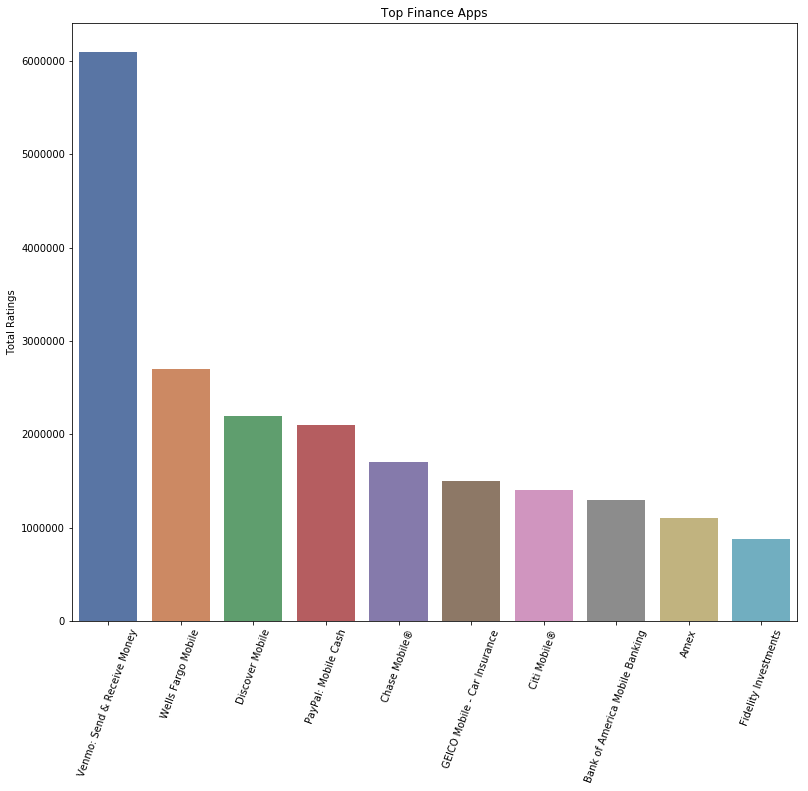

In [415]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_finance_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Finance Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [487]:
df.columns

Index(['age_rating', 'app_rating', 'category', 'compatibility', 'languages',
       'name', 'price', 'rank', 'rating_count', 'size', 'num_languages',
       'boolean_rank', 'free_or_not'],
      dtype='object')

In [66]:
df['price']=df.price.astype(str)
df['price']=df.price.str.split('$',expand = True)[0]
df['price'].fillna(value=0, inplace=True)
df['price']= df['price'].apply(float)


(0, 30)

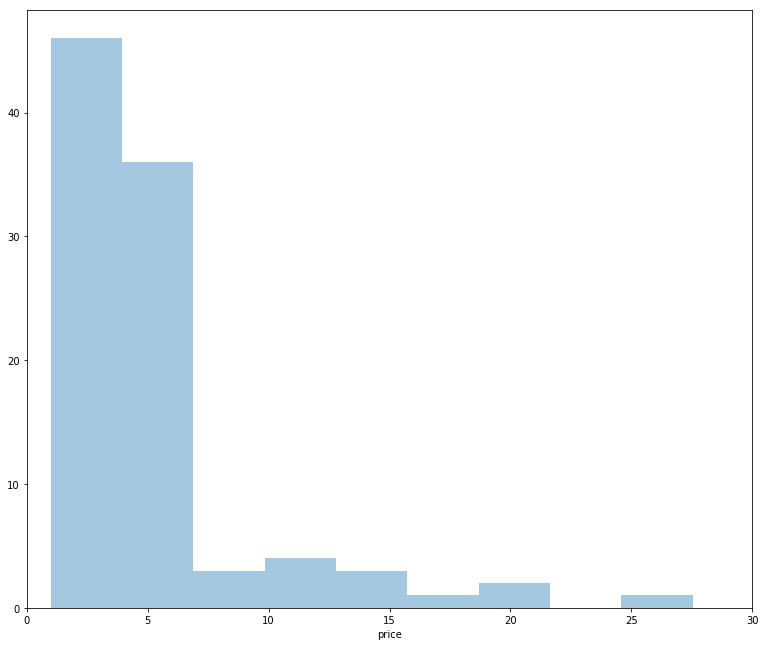

In [79]:
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.distplot(df[df['price']!=0.0]['price'],bins=20,kde=False)


In [112]:
df[df['price']!=0].groupby('price').agg({'rating_count':'mean'}).sort_values(by='rating_count').reset_index()

,price,rating_count
0,16.99,68.000000
1,7.99,262.000000
2,9.99,1997.333333
3,1.99,3197.400000
4,24.99,6700.000000
5,0.99,7432.750000
6,4.99,9252.230769
7,59.99,9500.000000
8,11.99,15800.000000
9,3.99,16057.833333


Text(0.5, 1.0, 'Average No. Ratings in Paid Apps')

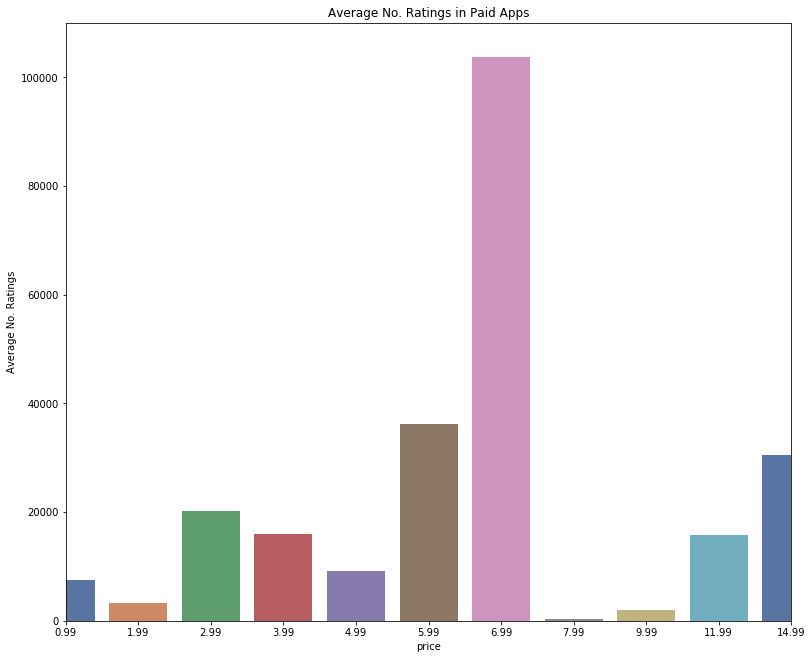

In [131]:

a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(x='price',y='rating_count',data=temp,palette='deep')
plt.xlim(0,10) 
plt.ylim(0,110000)
plt.ylabel("Average No. Ratings")
plt.title("Average No. Ratings in Paid Apps")

In [115]:

df[df['price']==0].groupby('price').agg({'rating_count':'mean'})

,rating_count
price,
0.0,62407.685144


In [135]:
df.sort_values('rating_count',ascending = False)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
493,12,4.8,Photo & Video,Requires iOS 10.0 or later. Compatible with iP...,"English, Croatian, Czech, Danish, Dutch, Finni...",Instagram,0.0,2.0,12500000.0,180.5,31,True,False
494,17,4.7,Photo & Video,Requires iOS 10.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...","YouTube: Watch, Listen, Stream",0.0,1.0,8300000.0,280.8,73,True,False
3806,4,4.9,Finance,Requires iOS 10.0 or later. Compatible with iP...,English,Venmo: Send & Receive Money,0.0,2.0,6100000.0,131.8,1,True,False
2847,4,4.9,Travel,Requires iOS 11.0 or later. Compatible with iP...,"English, Chinese, French, Portuguese, Spanish",Lyft,0.0,2.0,5500000.0,161.8,5,True,False
5000,12,4.7,Social Networking,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Catalan, Croatian, C...",WhatsApp Messenger,0.0,3.0,5300000.0,155.7,39,True,False
958,12,4.6,Games,Requires iOS 11.0 or later. Compatible with iP...,English,Fortnite,0.0,1.0,4300000.0,148.4,1,True,False
254,4,4.9,Reference,Requires iOS 10.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Arabic, Belarusi...",Bible,0.0,2.0,3500000.0,179.9,54,True,False
1416,4,4.8,Lifestyle,Requires iOS 11.0 or later. Compatible with iP...,English,Zillow Real Estate & Rentals,0.0,2.0,3400000.0,119.6,1,True,False
1654,12,4.8,Food & Drink,Requires iOS 11.0 or later. Compatible with iP...,"English, French",DoorDash - Order Food Delivery,0.0,2.0,3400000.0,125.1,2,True,False
1651,4,4.8,Food & Drink,Requires iOS 10.0 or later. Compatible with iP...,"English, Spanish",Domino's Pizza USA,0.0,9.0,3300000.0,178.2,2,True,False


In [140]:
df.isna().sum()

age_rating          0
app_rating          0
category            0
compatibility       0
languages          38
name                0
price               0
rank             1890
rating_count        0
size                0
num_languages       0
boolean_rank        0
free_or_not         0
dtype: int64

In [160]:
df['languages']=df['languages'].astype(str)

In [161]:
df['languages']=df['languages'].astype(str)
df['languages'].apply(lambda x:x.replace('nan', "English"))

0       English, French, German, Italian, Portuguese, ...
1                                                 English
2                                                 English
3       English, French, German, Italian, Portuguese, ...
4                                                 English
5       English, Dutch, German, Italian, Japanese, Kor...
6                   English, Italian, Portuguese, Spanish
7                                                 English
8        English, Portuguese, Simplified Chinese, Spanish
9       English, French, German, Italian, Japanese, Po...
10                                                English
11                                                English
12                                                Spanish
13      English, Danish, Dutch, French, German, Hungar...
14      English, French, German, Italian, Japanese, Po...
15                                                English
16                                                English
17            

In [165]:
df.isna().sum()

age_rating          0
app_rating          0
category            0
compatibility       0
languages           0
name                0
price               0
rank             1890
rating_count        0
size                0
num_languages       0
boolean_rank        0
free_or_not         0
dtype: int64